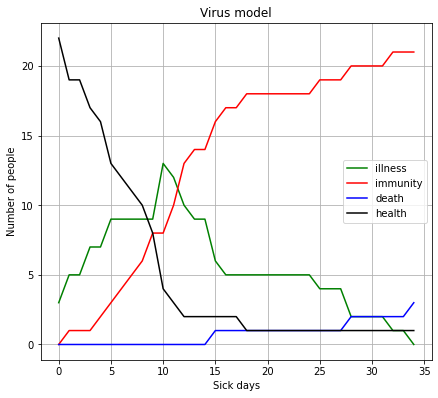

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
from collections import Counter

class Virus_new: 
    
     def __init__(self,N,setka,Z1,Z2,Z3):
            self.N = N
            self.setka = setka 
            self.Z1 = Z1
            self.Z2 = Z2
            self.Z3 = Z3
            
    
     def neighbours(self,sick):
        #savenb = []
            count1 = 0
            count2 = 0
            count3 = 0
            count4 = 0
            new_sick = []
            for j in range(len(sick)):
                nb = []
                rubbish = sick[j][:] # копирование
                #print(rubbish)
                rubbish[0] += 1
                if rubbish[0] <= self.N-1:
                    nb.append(rubbish)
                    #print(nb)

                rubbish = sick[j][:]
                rubbish[0] -= 1
                if rubbish[0] >= 0:
                    nb.append(rubbish)
                    #print(nb)

                rubbish = sick[j][:]
                rubbish[1] += 1
                if rubbish[1] <= self.N-1:
                    nb.append(rubbish)
                    #print(nb)

                rubbish = sick[j][:]
                rubbish[1] -= 1
                if rubbish[1] >= 0:
                    nb.append(rubbish)
                # нашли всех соседей для первого больного
                nb.append(sick[j][:]) # первая группа больных
                #print(nb)
                for i in range(len(nb)):
                    ksi = rd.uniform(0,1)
                    #print(ksi)
                    if self.setka[nb[i][0]][nb[i][1]] == 1: 
                        ksi = rd.uniform(0,1)
                        #print(ksi)
                        if ksi <= Z3:
                            self.setka[nb[i][0]][nb[i][1]] = 3 # смерть
                            #count3 +=1
                            #count1 -=1
                        elif ksi > Z3 and ksi <= Z2+Z3:
                            self.setka[nb[i][0]][nb[i][1]] = 2 # иммунитет 
                            #count2 +=1
                            #count1 -=1
                        else:
                            new_sick.append([nb[i][0]] + [nb[i][1]])
                            #count1 +=1
                            
                    if self.setka[nb[i][0]][nb[i][1]] == 0:  # смотрим для здоровых
                        if ksi<=Z1: # заболеет или нет 
                            self.setka[nb[i][0]][nb[i][1]] = 1
                            new_sick.append([nb[i][0]] + [nb[i][1]])
                            #count1 += 1
            tmp = []
            for i in new_sick: # смотрим элемент из списка
                if i not in tmp:
                    tmp.append(i)  # смотрю на уникальные элементы
            
                    
            for i in range(len(self.setka)):
                for j in range(len(self.setka)):
                    if self.setka[i][j] == 1:
                        count1 += 1
                    elif self.setka[i][j] == 2:
                        count2 +=1
                    elif self.setka[i][j] == 3:
                        count3 +=1
                    else:
                        count4 +=1
            statistic = []
            statistic.append(count1)
            statistic.append(count2)
            statistic.append(count3)
            statistic.append(count4)
            #print(statistic)
                    

            
            #print(self.setka)
            return tmp,statistic # тут через запятую можно значения передавать
                            
            
        
    
            
            
    
    
    
    
    
    
data_Z1 = [] # данные для статистики
data_Z2 = []
data_Z3 = []
data_Z4 = []
N = 3 # число заболевших, можем менять, входный параметр
P = 5 # размер сетки
Z1 = 0.1 # заражение
Z2 = 0.05 # имунный 
Z3 = 0.01 # смерть
sick_people = [] # местоположение больных
setka = np.zeros((P,P))

# рандомный выбор больных 
I = N
while I!=0:
    coord = []
    x = rd.randint(0,P-1)
    #print(sick_people)
    
    #rd.seed(2)
    y = rd.randint(0,P-1)
    coord.append(x)
    coord.append(y)
    #print(coord)
    if coord in sick_people: continue
    else: 
        sick_people.append(coord)
        I = I - 1
    #print(N)

#print(sick_people)
# начальная конфигурация сетки
for j in range(N):
    setka[sick_people[j][0]][sick_people[j][1]] = 1
#print(setka)

w = Virus_new(P,setka,Z1,Z2,Z3)
count4 = 0
count3 = 0
count2 = 0
count1 = 0
end = 0
for i in range(1000): # набор статистики 
    m,st = w.neighbours(sick_people) # нахождение соседей для больных и поиск новых больных; тут лучше через запятую передавать параметры
    #print(m)
    
    count4 = st[3]
    count3 = st[2]      # в общем случае можно написать цикл от числа параметров
    count2 = st[1]
    count1 = st[0]
    sick_people = m
    #print(sick_people)
    data_Z1.append(count1)
    data_Z2.append(count2)
    data_Z3.append(count3)
    data_Z4.append(count4)
    if st[0] <= 0:
        end = i
        break
    #print(sick_people)
    
# построение графика 
if end ==0 : end = 1000
i = np.arange(0,end+1,1)
fig,ax = plt.subplots(figsize = (7,6.2))
ax.set_title("Virus model")
ax.set_ylabel('Number of people')
ax.set_xlabel('Sick days')

ax.plot(data_Z1,color = 'green',label = 'illness')
ax.plot(data_Z2,color = 'red',label = 'immunity')
ax.plot(data_Z3,color = 'blue',label = 'death')
ax.plot(data_Z4,color = 'black',label = 'health')

#ax.legend(loc = 'upper right')
#plt.legend(('illness','immunity','death','health'))
plt.legend(loc = 'right')
#plt.legend((data_Z1,data_Z2,data_Z3,data_Z4),['illness','immunity','death','health'])
#ax.legend(loc = 'upper right')
#plt.plot(i,data_Z1,'g',i,data_Z2,'r',i,data_Z3,'b',i,data_Z4,'black')
plt.grid()
plt.show()

    
    
    
        
            
    



In [40]:
sick = [1,2,3]
print(len(sick))

3


In [69]:
type(3)


int